

## Exact diagonalization method

The full diagonalizaion method is illustrated on the example of quantum
Heisenber Hamiltonian diagonalization of 1D chain of $N$ spins.

\begin{align}
 H = \sum_{i = 1}^{N} J_{i, i+1} \hat{\mathbf{S}}_{i} \hat{\mathbf{S}}_{i + 1},
\end{align}

where $\hat{\mathbf{S}}_{i} = (\hat{S}^x, \hat{S}^y, \hat{S}^z ) =  (\sigma_x, \sigma_y, \sigma_z) / 2$ is spin oprerator which acts on the i-th spin. Its components are Pauli matrices
$\sigma_x=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$, $\sigma_y=\begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$ and $\sigma_z=\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$ where is assumed that $\hbar = 1$. The quantum states of the model are typically described via the basis vectors $\rvert \uparrow_i \rangle = (1, 0)^\text{T}$ and $\rvert \downarrow_i \rangle = (0, 1)^\text{T}$

The quantum Heisenber Hamiltonian can also be written as follows

\begin{align}
 H = \sum_{i = 1}^{N} ( J_z  \hat{S}^z_{i} \hat{S}^z_{i + 1} + J_{x}\hat{S}^x_{i} \hat{S}^x_{i + 1} + J_y \hat{S}^y_{i} \hat{S}^y_{i + 1} ).
\end{align}

Let us consider model with $J_x = J_y \neq J_z$, so called XXZ model

\begin{align}
 H = J_z \sum_{i = 1}^{N} \hat{S}^z_{i} \hat{S}^z_{i + 1} + J_{xy} \sum_{i = 1}^{N} (\hat{S}^x_{i} \hat{S}^x_{i + 1} + \hat{S}^y_{i} \hat{S}^y_{i + 1}).
\end{align}

Action of spin components operators on state basis vectors reads

\begin{align}
\begin{split}
& \hat{S^x} \rvert \uparrow_i \rangle = 1/2  \rvert \downarrow_i \rangle \quad \hat{S^x} \rvert \downarrow_i \rangle = 1/2  \rvert \uparrow_i \rangle, \\
& \hat{S^y} \rvert \uparrow_i \rangle = i/2  \rvert \downarrow_i \rangle \quad \hat{S^y} \rvert \downarrow_i \rangle = -i/2  \rvert \uparrow_i \rangle, \\
& \hat{S^z} \rvert \uparrow_i \rangle = 1/2  \rvert \uparrow_i \rangle \quad \hat{S^z} \rvert \downarrow_i \rangle = -1/2  \rvert \downarrow_i \rangle. \\
\end{split}
\end{align}

The action of spin operators in the Hamiltonian on the nearest neighbours spins reads

\begin{align}
\begin{split}
&J_z S^z_i S^z_{i+1} \rvert \uparrow_i \downarrow_{i+1} \rangle = -J_z/4 \rvert \uparrow_i \downarrow_{i+1} \rangle, \quad J_z S^z_i S^z_{i+1} \rvert \uparrow_i \uparrow_{i+1} \rangle = J_z/4 \rvert \uparrow_i \uparrow_{i+1} \rangle, \\
&J_x (S^x_i S^x_{i+1} + S^y_i S^y_{i+1}) \rvert \uparrow_i \uparrow_{i+1} \rangle = 0, \quad
J_x (S^x_i S^x_{i+1} + S^y_i S^y_{i+1}) \rvert \uparrow_i \downarrow_{i+1} \rangle = J_x / 2  \rvert \downarrow_i \uparrow_{i+1} \rangle.
\end{split}
\end{align}

### Example: quantum Heisenberg Hamiltonian matrix elements of spin dimer

The matrix elements of the Hamiltonian are given as $H_{\alpha \beta} = \langle \alpha \rvert H \rvert \beta \rangle$, where $\alpha$, $\beta$ are states e.g. $\rvert \uparrow_i \downarrow_{i+1} \rangle$.
State of nearest neigbours spins is described via two basis states. To find the scalar product of the 
nearest neigbours spins states use
$\langle u_1 u_2 \rvert v_1 v_2 \rangle = \langle u_1 \rvert v_1 \rangle \langle u_2 \rvert v_2 \rangle$.

\begin{matrix}
& \rvert \uparrow \uparrow \rangle & \rvert \uparrow \downarrow \rangle & \rvert \downarrow \uparrow \rangle & \rvert  \downarrow \downarrow \rangle \\
\rvert \uparrow \uparrow \rangle & J_z / 4 & 0 & 0 & 0 \\
\rvert \uparrow \downarrow \rangle & 0 & -J_z / 4 & J_x / 2 & 0 \\
\rvert \downarrow \uparrow \rangle & 0 & J_x / 2 & -J_z / 4 & 0 \\
\rvert  \downarrow \downarrow \rangle & 0 & 0 & 0  & J_z / 4 \\
\end{matrix}

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

from math import factorial, comb
from termcolor import colored

In [3]:
# spinors basis vectors 0 == spin down, 1 == spin up
spinors = {0: np.array([[0, 1]]).T, 1:  np.array([[1, 0]]).T}
# convert list coded state to bispinor 
state2bispinor = lambda i, j: np.concatenate((spinors[i], spinors[j]), axis=1)

def show_state(state: list):
    """Show state given as list."""
    up, down = colored('\u21D1', 'red'), colored('\u21D3', 'blue')
    state_str = '|'.join([up if i > 0 else down for i in state])
    print(f"state: {state_str}\ttotal S: {sum([i if i > 0 else -1 for i in state])}")

def gen_space(N: int=1) -> list:
    """Generate Hilbert space for chain of N S=1/2 spins."""
    return [list(_) for _ in np.ndindex(tuple([2] * N))]

def show_space(space: list):
    N = len(space[0])
    total_S_freq = {i: 0 for i in range(-N-1, N+1, 1)} # frequencies of particular total spin states
    for state in space:
        temp_S = sum([i if i > 0 else -1 for i in state])
        total_S_freq[temp_S] += 1
    # plot distribution
    plt.bar(list(total_S_freq.keys()), list(total_S_freq.values()), color='orange', label=f'L={N}, states: {len(space)}')
    plt.xlim(-N - 1, N + 1)
    plt.xlabel('Total spin')
    plt.ylabel('Number of states')
    plt.title('XXZ spin chain')
    plt.legend()
    plt.show()

def gen_ham_xxz(space: list, J_z: float=1.0, J_x: float=1.0) -> list:
    """
    Calculate matrix elements of the XXZ Hamiltonian 
    in the given basis.
    """
    Ham = np.zeros((len(space), len(space)))
    # spin operators 
    S_x = 0.5 * np.array([[0, 1],[1, 0]])
    S_y = 0.5 * np.array([[0, -1j],[1j, 0]])
    S_z = 0.5 * np.array([[1, 0],[0, -1]])

    def SS(S: list, i: int, j: int):
        """Calculate S_i S_{j} | state_i state_{j} >"""
        prod_1 = np.dot(S, spinors[i])
        prod_2 = np.dot(S, spinors[j])
        h = np.sum(prod_1) * np.sum(prod_2) * np.concatenate((np.abs(2 * prod_1), np.abs(2 * prod_2)), axis=1)
        return np.real(h)

    # XXZ Hamiltonian on two nearest neigbours spins
    Hz = lambda i, j: J_z * SS(S_z, i, j)
    Hx = lambda i, j: J_x * (SS(S_x, i, j) +  SS(S_y, i, j))

    def get_matr_el(state_1, state_2):
        """Calculate matrix element of Hamiltonian for given states."""
        matr_el = 0.0
        for i in range(len(state_1)-1):
            bispinor_1 = state2bispinor(*state_1[i:i+2])
            bispinor_2 = state2bispinor(*state_2[i:i+2])
            hz_1 = Hz(*state_1[i:i+2])
            hx_1 = Hx(*state_1[i:i+2])
            matr_el += np.tensordot(bispinor_2, hz_1) * (0, 1)[float(abs(np.dot(bispinor_2[:,0], hz_1[:,0]) * np.dot(bispinor_2[:,1], hz_1[:,1]))) > 0] \
                + np.tensordot(bispinor_2, hx_1) * (0, 1)[float(abs(np.dot(bispinor_2[:,0], hx_1[:,0]) * np.dot(bispinor_2[:,1], hx_1[:,1]))) > 0]

            #show_state(state_1[i:i+2])
            #show_state(state_2[i:i+2])
            # print(f'Hz {hz_1}')
            # print(f'Hx {hx_1}')
            # print(f'alpha {bispinor_2}')
            # print(f'Hz matr_el {np.dot(bispinor_2[:,0], hz_1[:,0]) * np.dot(bispinor_2[:,1], hz_1[:,1])}')
            # print(f'Hx matr_el {np.dot(bispinor_2[:,0], hx_1[:,0]) * np.dot(bispinor_2[:,1], hx_1[:,1])}')
            # print(f'matr el: {matr_el}\n')

        # < state_1 | H | state_2 > where state_1,2 = | k l > 
        return 0.5 * matr_el
    
    for i, state_1 in enumerate(space):
        for j, state_2 in enumerate(space):
            Ham[i, j] = get_matr_el(state_1, state_2) 
    return Ham

def get_spectrum():
    pass

        


    


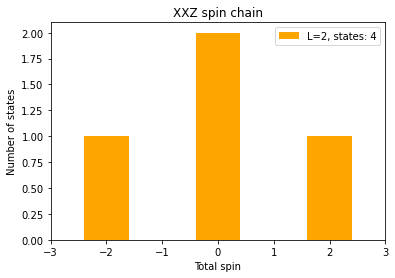

state: ⇓|⇓	total S: -2
state: ⇓|⇑	total S: 0
state: ⇑|⇓	total S: 0
state: ⇑|⇑	total S: 2


In [5]:
space = gen_space(2)
show_space(space)
for state in space:
    show_state(state)


[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]


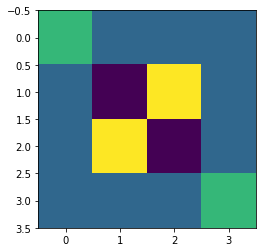

In [6]:
Ham = gen_ham_xxz(space)
print(Ham)
plt.imshow(Ham)
plt.show()